In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from numpy import loadtxt, where
from pylab import scatter, show, legend, xlabel, ylabel
from imblearn.under_sampling import InstanceHardnessThreshold
from collections import Counter
from imblearn.under_sampling import AllKNN
from sklearn.datasets import make_classification
from imblearn.under_sampling import ClusterCentroids 
from imblearn.under_sampling import NeighbourhoodCleaningRule 
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import     OneSidedSelection 
from imblearn.under_sampling import TomekLinks 
import xgboost as xgb
from sklearn import metrics
from sklearn.cross_validation import cross_val_score

G:\ana\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
from xgboost.sklearn import XGBClassifier

In [3]:
from sklearn.model_selection import StratifiedKFold

In [4]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [5]:
from sklearn.metrics import accuracy_score

In [83]:
df = pd.read_csv("C:\Users\VARUN\Downloads\cvisheshtrain.csv")

In [84]:
mvar12_dummy = pd.get_dummies(df['mvar12'])
df =  pd.concat([df, mvar12_dummy], axis=1)
del df['mvar12']
del df['mvar1']

In [85]:
Y2 = df.loc[:, 'mvar49':'mvar51']

In [103]:
conditions = [
    (Y2['mvar49'] == 1) ,
    (Y2['mvar50'] == 1) ,
    (Y2['mvar51'] == 1),
    
]
choices = ['1', '2', '3']
Y2['offer'] = np.select(conditions, choices,default=0)


In [87]:
del df['mvar49']
del df['mvar50']
del df['mvar51']

In [88]:
Y2_offer = Y2['offer']


In [267]:
train = pd.concat([df, Y2_offer], axis=1)





In [268]:
train.head()
del train['mvar46']
del train['mvar47']
del train['mvar48']

In [269]:
train['offer'] = map(float,train['offer'])

In [270]:
train.columns

Index([u'cm_key', u'mvar2', u'mvar3', u'mvar4', u'mvar5', u'mvar6', u'mvar7',
       u'mvar8', u'mvar9', u'mvar10', u'mvar11', u'mvar13', u'mvar14',
       u'mvar15', u'mvar16', u'mvar17', u'mvar18', u'mvar19', u'mvar20',
       u'mvar21', u'mvar22', u'mvar23', u'mvar24', u'mvar25', u'mvar26',
       u'mvar27', u'mvar28', u'mvar29', u'mvar30', u'mvar31', u'mvar32',
       u'mvar33', u'mvar34', u'mvar35', u'mvar36', u'mvar37', u'mvar38',
       u'mvar39', u'mvar40', u'mvar41', u'mvar42', u'mvar43', u'mvar44',
       u'mvar45', u'Apparel', u'Automotive         ', u'Construction       ',
       u'Consumables        ', u'Durable goods      ', u'Entertainment      ',
       u'Finance            ', u'Household          ', u'Manufacturing      ',
       u'Mining             ', u'Misc services      ', u'Non durable goods  ',
       u'Office supplies    ', u'Personal services  ', u'Produce            ',
       u'Social services    ', u'Transport          ', u'Unknown            ',
       u'offe

In [271]:
target = 'offer'
IDcol = 'cm_key'

In [93]:
#Import libraries:
import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Perforing grid search

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

In [136]:
def modelfit(alg, dtrain, predictors,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgb_param['num_class'] = 4
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            stratified= True,metrics='mlogloss', early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target],eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])
    #print dtrain_predprob
        
    #Print model report:
    print "\nModel Report"
    print "Accuracy : %.4g" % metrics.accuracy_score(dtrain[target].values, dtrain_predictions)
    print "AUC Score (Train): %f" % metrics.log_loss(Y2['offer'], dtrain_predprob)
    print cvresult                
    feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')


Model Report
Accuracy : 0.7959
AUC Score (Train): 0.549128
     test-mlogloss-mean  test-mlogloss-std  train-mlogloss-mean  \
0              1.286132           0.000336             1.285148   
1              1.203327           0.000503             1.201343   
2              1.134134           0.000546             1.131233   
3              1.075360           0.000626             1.071593   
4              1.025531           0.000558             1.020873   
5              0.982803           0.000552             0.977199   
6              0.945512           0.000752             0.939110   
7              0.913349           0.001010             0.906098   
8              0.885336           0.000882             0.877190   
9              0.860895           0.000877             0.851889   
10             0.839608           0.001146             0.829748   
11             0.820865           0.001382             0.810221   
12             0.804343           0.001503             0.792817   
13

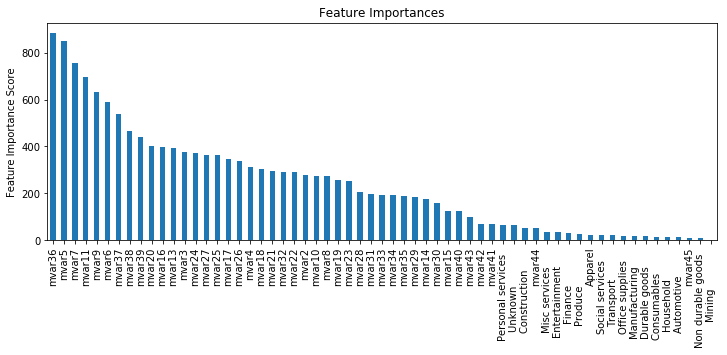

In [137]:
#Choose all predictors except target & IDcols
predictors = [x for x in train.columns if x not in [target, IDcol]]
xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'multi:softprob',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

modelfit(xgb1, train, predictors)

In [138]:
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=145, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'multi:softprob', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='log_loss',n_jobs=4,iid=False, cv=5)
gsearch1.fit(train[predictors],train[target])
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: -0.65548, std: 0.00342, params: {'max_depth': 3, 'min_child_weight': 1},
  mean: -0.65567, std: 0.00333, params: {'max_depth': 3, 'min_child_weight': 3},
  mean: -0.65544, std: 0.00348, params: {'max_depth': 3, 'min_child_weight': 5},
  mean: -0.65230, std: 0.00338, params: {'max_depth': 5, 'min_child_weight': 1},
  mean: -0.65205, std: 0.00340, params: {'max_depth': 5, 'min_child_weight': 3},
  mean: -0.65192, std: 0.00363, params: {'max_depth': 5, 'min_child_weight': 5},
  mean: -0.65712, std: 0.00482, params: {'max_depth': 7, 'min_child_weight': 1},
  mean: -0.65700, std: 0.00625, params: {'max_depth': 7, 'min_child_weight': 3},
  mean: -0.65563, std: 0.00517, params: {'max_depth': 7, 'min_child_weight': 5},
  mean: -0.67193, std: 0.00701, params: {'max_depth': 9, 'min_child_weight': 1},
  mean: -0.66770, std: 0.00541, params: {'max_depth': 9, 'min_child_weight': 3},
  mean: -0.66435, std: 0.00598, params: {'max_depth': 9, 'min_child_weight': 5}],
 {'max_depth': 5, 'min_chil

In [139]:
# model1 = XGBClassifier()
param_test2 = {
 'max_depth':[4,5,6],
 'min_child_weight':[4,5,6]
}
gsearch2 = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=145, max_depth=5,
 min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'multi:softprob', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test2, scoring='log_loss',n_jobs=4,iid=False, cv=5)
gsearch2.fit(train[predictors],train[target])
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

([mean: -0.65298, std: 0.00374, params: {'max_depth': 4, 'min_child_weight': 4},
  mean: -0.65284, std: 0.00371, params: {'max_depth': 4, 'min_child_weight': 5},
  mean: -0.65309, std: 0.00318, params: {'max_depth': 4, 'min_child_weight': 6},
  mean: -0.65197, std: 0.00330, params: {'max_depth': 5, 'min_child_weight': 4},
  mean: -0.65192, std: 0.00363, params: {'max_depth': 5, 'min_child_weight': 5},
  mean: -0.65176, std: 0.00359, params: {'max_depth': 5, 'min_child_weight': 6},
  mean: -0.65320, std: 0.00451, params: {'max_depth': 6, 'min_child_weight': 4},
  mean: -0.65313, std: 0.00468, params: {'max_depth': 6, 'min_child_weight': 5},
  mean: -0.65337, std: 0.00450, params: {'max_depth': 6, 'min_child_weight': 6}],
 {'max_depth': 5, 'min_child_weight': 6},
 -0.6517594208595753)

In [115]:
# param_test2b = {
#  'min_child_weight':[6,8,10,12]
# }
# gsearch2b = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=162, max_depth=5,
#  min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
#  objective= 'multi:softprob', nthread=4, scale_pos_weight=1,seed=27), 
#  param_grid = param_test2b, scoring='log_loss',n_jobs=4,iid=False, cv=5)
# gsearch2b.fit(train[predictors],train[target])

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=5,
       min_child_weight=2, missing=None, n_estimators=162, nthread=4,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=27, silent=True, subsample=0.8),
       fit_params={}, iid=False, n_jobs=4,
       param_grid={'min_child_weight': [6, 8, 10, 12]},
       pre_dispatch='2*n_jobs', refit=True, scoring='log_loss', verbose=0)

In [116]:
gsearch2b.grid_scores_, gsearch2b.best_params_, gsearch2b.best_score_

([mean: -0.47374, std: 0.00308, params: {'min_child_weight': 6},
  mean: -0.47478, std: 0.00326, params: {'min_child_weight': 8},
  mean: -0.47471, std: 0.00337, params: {'min_child_weight': 10},
  mean: -0.47456, std: 0.00323, params: {'min_child_weight': 12}],
 {'min_child_weight': 6},
 -0.47373510851666606)

In [140]:
param_test3 = {
 'gamma':[i/10.0 for i in range(0,5)]
}
gsearch3 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=145, max_depth=5,
 min_child_weight=6, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'multi:softprob', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test3, scoring='log_loss',n_jobs=4,iid=False, cv=5)
gsearch3.fit(train[predictors],train[target])
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

([mean: -0.65176, std: 0.00359, params: {'gamma': 0.0},
  mean: -0.65189, std: 0.00336, params: {'gamma': 0.1},
  mean: -0.65204, std: 0.00372, params: {'gamma': 0.2},
  mean: -0.65201, std: 0.00344, params: {'gamma': 0.3},
  mean: -0.65199, std: 0.00306, params: {'gamma': 0.4}],
 {'gamma': 0.0},
 -0.6517594208595753)


Model Report
Accuracy : 0.7968
AUC Score (Train): 0.546481
     test-mlogloss-mean  test-mlogloss-std  train-mlogloss-mean  \
0              1.286124           0.000297             1.285239   
1              1.203347           0.000492             1.201537   
2              1.134151           0.000478             1.131496   
3              1.075336           0.000548             1.071904   
4              1.025475           0.000501             1.021232   
5              0.982736           0.000473             0.977618   
6              0.945446           0.000680             0.939588   
7              0.913237           0.000963             0.906580   
8              0.885170           0.000843             0.877742   
9              0.860703           0.000828             0.852507   
10             0.839439           0.001107             0.830397   
11             0.820626           0.001402             0.810925   
12             0.804065           0.001560             0.793590   
13

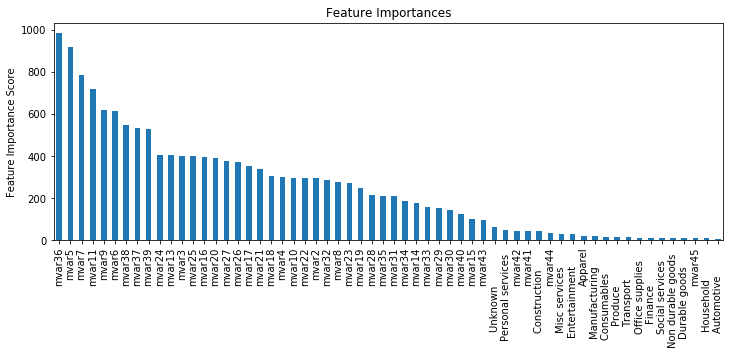

In [141]:
xgb2 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=6,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'multi:softprob',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb2, train, predictors)

In [142]:
# param_test4 = {
#  'subsample':[i/10.0 for i in range(6,10)],
#  'colsample_bytree':[i/10.0 for i in range(6,10)]
# }
# gsearch4 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=172, max_depth=5,
#  min_child_weight=6, gamma=0, subsample=0.8, colsample_bytree=0.8,
#  objective= 'multi:softprob', nthread=4, scale_pos_weight=1,seed=27), 
#  param_grid = param_test4, scoring='log_loss',n_jobs=4,iid=False, cv=5)
# gsearch4.fit(train[predictors],train[target])
# gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_

KeyboardInterrupt: 

In [143]:
param_test5 = {
 'subsample':[i/100.0 for i in range(75,90,5)],
 'colsample_bytree':[i/100.0 for i in range(75,90,5)]
}
gsearch5 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=172, max_depth=5,
 min_child_weight=6, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'multi:softprob', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test5, scoring='log_loss',n_jobs=4,iid=False, cv=5)
gsearch5.fit(train[predictors],train[target])

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=5,
       min_child_weight=6, missing=None, n_estimators=172, nthread=4,
       objective='multi:softprob', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=27, silent=True, subsample=0.8),
       fit_params={}, iid=False, n_jobs=4,
       param_grid={'subsample': [0.75, 0.8, 0.85], 'colsample_bytree': [0.75, 0.8, 0.85]},
       pre_dispatch='2*n_jobs', refit=True, scoring='log_loss', verbose=0)

In [144]:
gsearch5.grid_scores_, gsearch5.best_params_, gsearch5.best_score_


([mean: -0.65196, std: 0.00419, params: {'subsample': 0.75, 'colsample_bytree': 0.75},
  mean: -0.65224, std: 0.00371, params: {'subsample': 0.8, 'colsample_bytree': 0.75},
  mean: -0.65262, std: 0.00429, params: {'subsample': 0.85, 'colsample_bytree': 0.75},
  mean: -0.65099, std: 0.00435, params: {'subsample': 0.75, 'colsample_bytree': 0.8},
  mean: -0.65205, std: 0.00385, params: {'subsample': 0.8, 'colsample_bytree': 0.8},
  mean: -0.65265, std: 0.00422, params: {'subsample': 0.85, 'colsample_bytree': 0.8},
  mean: -0.65187, std: 0.00445, params: {'subsample': 0.75, 'colsample_bytree': 0.85},
  mean: -0.65202, std: 0.00377, params: {'subsample': 0.8, 'colsample_bytree': 0.85},
  mean: -0.65262, std: 0.00444, params: {'subsample': 0.85, 'colsample_bytree': 0.85}],
 {'colsample_bytree': 0.8, 'subsample': 0.75},
 -0.6509881633047543)

In [145]:
param_test6 = {
 'reg_alpha':[ 0.001,0.005, 0.1,0.5, 1, 5]
}
gsearch6 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=172, max_depth=5,
 min_child_weight=6, gamma=0.1, subsample=0.75, colsample_bytree=0.8,
 objective= 'multi:softprob', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test6, scoring='log_loss',n_jobs=4,iid=False, cv=5)
gsearch6.fit(train[predictors],train[target])
gsearch6.grid_scores_, gsearch6.best_params_, gsearch6.best_score_

([mean: -0.65116, std: 0.00440, params: {'reg_alpha': 0.001},
  mean: -0.65134, std: 0.00447, params: {'reg_alpha': 0.005},
  mean: -0.65127, std: 0.00432, params: {'reg_alpha': 0.1},
  mean: -0.65119, std: 0.00432, params: {'reg_alpha': 0.5},
  mean: -0.65126, std: 0.00475, params: {'reg_alpha': 1},
  mean: -0.65204, std: 0.00437, params: {'reg_alpha': 5}],
 {'reg_alpha': 0.001},
 -0.6511554581274862)

In [124]:
# param_test7 = {
#  'reg_alpha':[0.00010.0001,0.001]
# }
# gsearch7 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=162, max_depth=5,
#  min_child_weight=6, gamma=0.1, subsample=0.8, colsample_bytree=0.8,
#  objective= 'multi:softprob', nthread=4, scale_pos_weight=1,seed=27), 
#  param_grid = param_test7, scoring='log_loss',n_jobs=4,iid=False, cv=5)
# gsearch7.fit(train[predictors],train[target])
# gsearch7.grid_scores_, gsearch7.best_params_, gsearch7.best_score_

([mean: -0.47448, std: 0.00340, params: {'reg_alpha': 0.001},
  mean: -0.47399, std: 0.00359, params: {'reg_alpha': 0.005},
  mean: -0.47403, std: 0.00322, params: {'reg_alpha': 0.1},
  mean: -0.47399, std: 0.00341, params: {'reg_alpha': 0.5},
  mean: -0.47405, std: 0.00360, params: {'reg_alpha': 1}],
 {'reg_alpha': 0.5},
 -0.47398558209845626)


Model Report
Accuracy : 0.7946
AUC Score (Train): 0.551606
     test-mlogloss-mean  test-mlogloss-std  train-mlogloss-mean  \
0              1.286219           0.000364             1.285284   
1              1.203413           0.000500             1.201555   
2              1.134171           0.000525             1.131472   
3              1.075377           0.000679             1.071876   
4              1.025565           0.000654             1.021246   
5              0.982834           0.000587             0.977668   
6              0.945503           0.000892             0.939664   
7              0.913355           0.001153             0.906723   
8              0.885236           0.001060             0.877855   
9              0.860754           0.001056             0.852564   
10             0.839522           0.001312             0.830495   
11             0.820733           0.001592             0.811015   
12             0.804192           0.001720             0.793700   
13

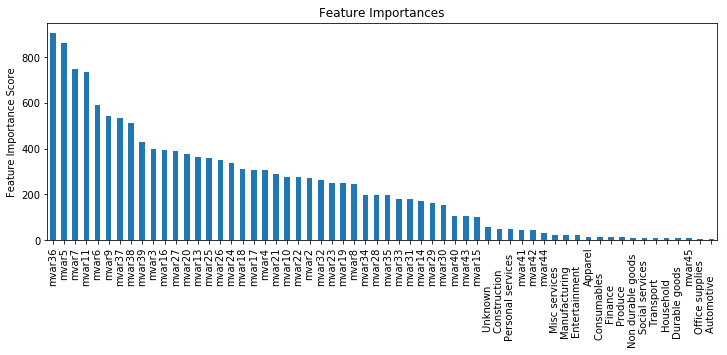

In [272]:
xgb3 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=6,
 gamma=0,
 subsample=0.75,
 colsample_bytree=0.8,
 reg_alpha=0.001,
 objective= 'multi:softprob',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb3, train, predictors)


Model Report
Accuracy : 0.8262
AUC Score (Train): 0.393783
      test-mlogloss-mean  test-mlogloss-std  train-mlogloss-mean  \
0               1.375094           0.000095             1.375018   
1               1.364045           0.000127             1.363910   
2               1.353336           0.000312             1.353127   
3               1.342655           0.000320             1.342365   
4               1.332206           0.000404             1.331851   
5               1.322021           0.000450             1.321579   
6               1.311987           0.000407             1.311476   
7               1.302121           0.000403             1.301520   
8               1.292396           0.000444             1.291704   
9               1.282765           0.000452             1.281998   
10              1.273372           0.000461             1.272539   
11              1.264072           0.000462             1.263151   
12              1.254879           0.000449             

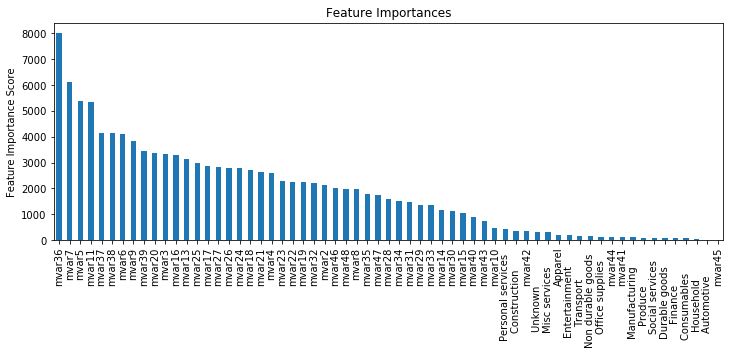

In [127]:
# xgb3 = XGBClassifier(
#  learning_rate =0.01,
#  n_estimators=5000,
#  max_depth=5,
#  min_child_weight=6,
#  gamma=0,
#  subsample=0.8,
#  colsample_bytree=0.8,
#  reg_alpha=0.5,
#  objective= 'multi:softprob',
#  nthread=4,
#  scale_pos_weight=1,
#  seed=27)
# modelfit(xgb3, train, predictors)

In [415]:
test_df = pd.read_csv("C:\Users\VARUN\Downloads\cvisheshleader.csv")
# "C:\Users\VARUN\Desktop\cFinal_Dataset.csv"
# test_df = pd.read_csv("C:\Users\VARUN\Desktop\cFinal_Dataset.csv")

In [416]:
test_X = test_df.loc[:, 'mvar1':'mvar45']
test_mvar12_dummy = pd.get_dummies(test_X['mvar12'])
test_X =  pd.concat([test_X, test_mvar12_dummy], axis=1)
del test_X['mvar12']
del test_X['mvar1']

In [417]:
test_X.head()

,mvar2,mvar3,mvar4,mvar5,mvar6,mvar7,mvar8,mvar9,mvar10,mvar11,...,Manufacturing,Mining,Misc services,Non durable goods,Office supplies,Personal services,Produce,Social services,Transport,Unknown
0,2,0,8,52,381,0.2490,0.1155,118845,0,5.6677,...,0,0,0,0,0,0,0,0,0,0
1,0,53460,2,56,872,0.5192,0.2682,475380,0,4.9459,...,0,0,0,0,0,0,0,0,0,0
2,0,109058,4,63,1253,0.7969,0.1155,172780,0,5.8674,...,0,0,0,0,0,0,0,1,0,0
3,0,53460,4,44,381,0.0155,0.0000,2918974,0,1.0798,...,0,0,0,0,0,0,0,0,0,1
4,1,183546,5,250,1842,0.7366,0.0000,2918974,1,5.9691,...,0,0,0,0,0,0,0,0,0,0


In [418]:
trainX = train

In [419]:
trainX.columns

Index([u'mvar2', u'mvar3', u'mvar4', u'mvar5', u'mvar6', u'mvar7', u'mvar8',
       u'mvar9', u'mvar10', u'mvar11', u'mvar13', u'mvar14', u'mvar15',
       u'mvar16', u'mvar17', u'mvar18', u'mvar19', u'mvar20', u'mvar21',
       u'mvar22', u'mvar23', u'mvar24', u'mvar25', u'mvar26', u'mvar27',
       u'mvar28', u'mvar29', u'mvar30', u'mvar31', u'mvar32', u'mvar33',
       u'mvar34', u'mvar35', u'mvar36', u'mvar37', u'mvar38', u'mvar39',
       u'mvar40', u'mvar41', u'mvar42', u'mvar43', u'mvar44', u'mvar45',
       u'Apparel', u'Automotive         ', u'Construction       ',
       u'Consumables        ', u'Durable goods      ', u'Entertainment      ',
       u'Finance            ', u'Household          ', u'Manufacturing      ',
       u'Mining             ', u'Misc services      ', u'Non durable goods  ',
       u'Office supplies    ', u'Personal services  ', u'Produce            ',
       u'Social services    ', u'Transport          ', u'Unknown            '],
      dtype='object')

In [420]:
# del trainX['cm_key']

In [421]:
# del trainX['offer']

In [422]:
# trainX.columns

In [ ]:
# Y2_offer.head()

In [ ]:
xgb3 = XGBClassifier(
 learning_rate =0.01,
 n_estimators=1778,
 max_depth=5,
 min_child_weight=6,
 gamma=0,
 subsample=0.75,
 colsample_bytree=0.8,
 reg_alpha=0.001,
 objective= 'multi:softprob',
 nthread=4,
 scale_pos_weight=1,
 seed=27)




predicted49 = xgb3.fit(train,Y2_offer)


In [ ]:
# xgb3 = XGBClassifier(
#  learning_rate =0.1,
#  n_estimators=159,
#  max_depth=5,
#  min_child_weight=6,
#  gamma=0,
#  subsample=0.75,
#  colsample_bytree=0.8,
#  reg_alpha=0.001,
#  objective= 'multi:softprob',
#  nthread=4,
#  scale_pos_weight=1,
#  seed=27)




# predicted49 = xgb3.fit(trainX,Y2_offer)


In [423]:
prediction = xgb3.predict(test_X)

In [424]:
train.head()

,mvar2,mvar3,mvar4,mvar5,mvar6,mvar7,mvar8,mvar9,mvar10,mvar11,...,Manufacturing,Mining,Misc services,Non durable goods,Office supplies,Personal services,Produce,Social services,Transport,Unknown
0,0,106920,4,18,970,0.7969,0.1831,337236,1,6.0899,...,0,0,0,0,1,0,0,0,0,0
1,2,0,4,19,1030,0.0678,0.0000,2918974,1,4.2016,...,0,0,0,0,0,0,0,0,0,1
2,2,399168,4,35,327,0.7551,0.2986,498656,0,3.3760,...,0,0,1,0,0,0,0,0,0,0
3,0,267300,4,274,1258,0.7969,0.5297,2480074,1,4.1082,...,0,0,0,0,0,0,0,1,0,0
4,0,213840,6,1,0,2.3238,0.0000,2918974,0,0.0000,...,0,0,0,0,0,0,0,0,0,1


In [425]:
test_X.head()

,mvar2,mvar3,mvar4,mvar5,mvar6,mvar7,mvar8,mvar9,mvar10,mvar11,...,Manufacturing,Mining,Misc services,Non durable goods,Office supplies,Personal services,Produce,Social services,Transport,Unknown
0,2,0,8,52,381,0.2490,0.1155,118845,0,5.6677,...,0,0,0,0,0,0,0,0,0,0
1,0,53460,2,56,872,0.5192,0.2682,475380,0,4.9459,...,0,0,0,0,0,0,0,0,0,0
2,0,109058,4,63,1253,0.7969,0.1155,172780,0,5.8674,...,0,0,0,0,0,0,0,1,0,0
3,0,53460,4,44,381,0.0155,0.0000,2918974,0,1.0798,...,0,0,0,0,0,0,0,0,0,1
4,1,183546,5,250,1842,0.7366,0.0000,2918974,1,5.9691,...,0,0,0,0,0,0,0,0,0,0


In [426]:
prob49 = xgb3.predict_proba(test_X)


In [427]:
prob49

array([[  8.63769054e-01,   5.84338568e-02,   6.63876086e-02,
          1.14095276e-02],
       [  6.95815980e-01,   4.19415869e-02,   2.36241400e-01,
          2.60010287e-02],
       [  7.13553309e-01,   5.02478033e-02,   8.94886255e-02,
          1.46710277e-01],
       ..., 
       [  5.39969981e-01,   7.39667490e-02,   7.07100611e-04,
          3.85356188e-01],
       [  8.12244594e-01,   5.29190898e-02,   1.19088002e-01,
          1.57482643e-02],
       [  8.80536497e-01,   3.36189531e-02,   7.51304030e-02,
          1.07140886e-02]], dtype=float32)

In [428]:
def prob1(value):
    result1 = pd.DataFrame(value)
    result2 = result1[result1.columns[0]]
    return result2
def prob2(value):
    result1 = pd.DataFrame(value)
    result2 = result1[result1.columns[1]]
    return result2
def prob3(value):
    result1 = pd.DataFrame(value)
    result2 = result1[result1.columns[2]]
    return result2
def prob4(value):
    result1 = pd.DataFrame(value)
    result2 = result1[result1.columns[3]]
    return result2

In [429]:
mvar49 = pd.DataFrame({'mvar49':prediction})

In [430]:
prob1 = pd.DataFrame({'prob1':prob1(prob49)})
prob2 = pd.DataFrame({'prob2':prob2(prob49)})
prob3 = pd.DataFrame({'prob3':prob3(prob49)})
prob4 = pd.DataFrame({'prob4':prob4(prob49)})

In [431]:
result_pred3 = pd.concat([prob1,prob2], axis=1)
result_pred3 = pd.concat([result_pred3,prob3], axis=1)
result_pred3 = pd.concat([result_pred3,prob4], axis=1)
result_pred3 = pd.concat([result_pred3,mvar49], axis=1)


In [432]:
test_df4=test_df

In [433]:
test_df4 = pd.concat([test_df,result_pred3], axis=1)

In [434]:
test_df4.head()

,cm_key,mvar1,mvar2,mvar3,mvar4,mvar5,mvar6,mvar7,mvar8,mvar9,...,mvar41,mvar42,mvar43,mvar44,mvar45,prob1,prob2,prob3,prob4,mvar49
0,70001,Charge,2,0,8,52,381,0.2490,0.1155,118845,...,0,0,1,0,0,0.863769,0.058434,0.066388,0.011410,0
1,70002,Charge,0,53460,2,56,872,0.5192,0.2682,475380,...,0,0,0,0,0,0.695816,0.041942,0.236241,0.026001,0
2,70003,Charge,0,109058,4,63,1253,0.7969,0.1155,172780,...,1,0,0,0,0,0.713553,0.050248,0.089489,0.146710,0
3,70004,Charge,0,53460,4,44,381,0.0155,0.0000,2918974,...,0,0,0,0,0,0.888032,0.026927,0.026667,0.058374,0
4,70005,Charge,1,183546,5,250,1842,0.7366,0.0000,2918974,...,0,0,0,0,0,0.881114,0.075183,0.000627,0.043075,0


In [435]:
test_df4['max_prob'] = test_df4[['prob2','prob3','prob4']].max(axis=1)

In [436]:
conditions = [
    (test_df4['max_prob'] == test_df4['prob2']) ,
    (test_df4['max_prob'] == test_df4['prob3']) ,
    (test_df4['max_prob'] == test_df4['prob4']),
    
]
choices = ['Supp', 'Elite', 'Credit']
test_df4['offer'] = np.select(conditions, choices)

In [437]:
test_df4.head()

,cm_key,mvar1,mvar2,mvar3,mvar4,mvar5,mvar6,mvar7,mvar8,mvar9,...,mvar43,mvar44,mvar45,prob1,prob2,prob3,prob4,mvar49,max_prob,offer
0,70001,Charge,2,0,8,52,381,0.2490,0.1155,118845,...,1,0,0,0.863769,0.058434,0.066388,0.011410,0,0.066388,Elite
1,70002,Charge,0,53460,2,56,872,0.5192,0.2682,475380,...,0,0,0,0.695816,0.041942,0.236241,0.026001,0,0.236241,Elite
2,70003,Charge,0,109058,4,63,1253,0.7969,0.1155,172780,...,0,0,0,0.713553,0.050248,0.089489,0.146710,0,0.146710,Credit
3,70004,Charge,0,53460,4,44,381,0.0155,0.0000,2918974,...,0,0,0,0.888032,0.026927,0.026667,0.058374,0,0.058374,Credit
4,70005,Charge,1,183546,5,250,1842,0.7366,0.0000,2918974,...,0,0,0,0.881114,0.075183,0.000627,0.043075,0,0.075183,Supp


In [438]:
test_df4 = test_df4.sort_values(['max_prob'],ascending=False)

In [379]:
test_new11= test_df4[['cm_key','offer']]

In [380]:
test_new11 = test_new11[0:1000]

In [381]:
test_new11.groupby('offer')['cm_key'].nunique()

offer
Credit    305
Elite     306
Supp      389
Name: cm_key, dtype: int64

In [346]:
path=r'G:\ '

test_new11.to_csv(path+'Saddlepoints_IITRoorkee_b2.csv',header=None,index=None)

In [347]:
test_df4['diff1'] = test_df4['prob1']-test_df4['prob2']
test_df4['diff2'] = test_df4['prob1']-test_df4['prob3']
test_df4['diff3']=test_df4['prob1']-test_df4['prob4']

In [439]:
test_df6 = test_df4

In [440]:
test_df6['min_prob'] = test_df4[['prob2','prob3','prob4']].min(axis=1)

In [441]:
test_df6 = test_df6.sort_values(['prob1'],ascending=True)

In [442]:
test_new12= test_df6[['cm_key','offer']]

In [443]:
test_new13 = test_new12[0:1000]

In [444]:
test_new13.groupby('offer')['cm_key'].nunique()

offer
Credit    374
Elite     375
Supp      251
Name: cm_key, dtype: int64

In [445]:
path=r'G:\ '

test_new13.to_csv(path+'Saddlepoints_IITRoorkee_b2.csv',header=None,index=None)

In [446]:
test_new13.head()

,cm_key,offer
8716,78717,Elite
667,70668,Elite
3251,73252,Elite
4143,74144,Elite
2913,72914,Elite
